# Introduction

In this notebook, we set out to ascertain the generalisability of our data and analysis to the broader TCR space.
We compared sequence properties of our dataset to a background of TCR sequences sampled from [OTS](https://opig.stats.ox.ac.uk/webapps/ots/ots_paired/) and also look at how the selected structures fit in the overall available TCR structures space.

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

# Load Data

## Load OTS data

In [2]:
ots_sample = pd.read_csv('../data/interim/ots_sample.csv')
ots_sample

,cdr1_aa_alpha,cdr2_aa_alpha,cdr3_aa_alpha,cdr1_aa_beta,cdr2_aa_beta,cdr3_aa_beta,v_call_alpha,v_call_beta,j_call_alpha,j_call_beta
0,TISGNEY,GLKNN,IVRVVWGGGADGLT,SGHDN,FVKESK,ASSLLGVSTDTQY,TRAV26-1*01,TRBV14*01,TRAJ45*01,TRBJ2-3*01
1,NSMFDY,ISSIKDK,AASAQGGSYIPT,LGHDT,YNNKEL,ASSRRPTDTQY,TRAV29/DV5*04,TRBV3-1*01,TRAJ6*01,TRBJ2-3*01
2,SSNFYA,MTLNGDE,ALGRNSGNTPLV,SGHAT,FQNNGV,ASNLAGAYEQY,TRAV24*01,TRBV11-2*01,TRAJ29*01,TRBJ2-7*01
3,SSVPPY,YTTGATLV,AVSEPGSQGNLI,DFQATT,SNEGSKA,SALGQPLGETQY,TRAV8-4*01,TRBV20-1*02,TRAJ42*01,TRBJ2-5*01
4,TSGFNG,NVLDGL,AVRDLRGSQGNLI,MGHRA,YSYEKL,ASSQAPQGADTQY,TRAV1-2*01,TRBV4-1*01,TRAJ42*01,TRBJ2-3*01
...,...,...,...,...,...,...,...,...,...,...
995,SSVPPY,YTTGATLV,AVSDRAAGNKLT,MNHNS,SASEGT,ASSLEGAVAGELF,TRAV8-4*01,TRBV6-1*01,TRAJ17*01,TRBJ2-2*01
996,TTLSN,LVKSGEV,AGQEGAQKLV,SGHAT,FQNNGV,ASSWDSKNIQY,TRAV25*01,TRBV11-2*01,TRAJ54*01,TRBJ2-4*01
997,TSINN,IRSNERE,ATPTTGGTSYGKLT,SQVTM,ANQGSEA,SVIPGQGSYGYT,TRAV17*01,TRBV29-1*01,TRAJ52*01,TRBJ1-2*01
998,SSYSPS,YTSAATLV,VVSGGYSSASKII,SGHNT,YENEEA,ASSQTGTRGNIQY,TRAV8-2*03,TRBV11-3*01,TRAJ3*01,TRBJ2-4*01


In [3]:
ots_sample_genes = ots_sample[['v_call_alpha', 'v_call_beta', 'j_call_alpha', 'j_call_beta']].copy()

ots_sample_genes['alpha_subgroup'] = ots_sample_genes['v_call_alpha'].str.extract(r'^(TRAV\d+)')
ots_sample_genes['beta_subgroup'] = ots_sample_genes['v_call_beta'].str.extract(r'^(TRBV\d+)')

ots_sample_genes

,v_call_alpha,v_call_beta,j_call_alpha,j_call_beta,alpha_subgroup,beta_subgroup
0,TRAV26-1*01,TRBV14*01,TRAJ45*01,TRBJ2-3*01,TRAV26,TRBV14
1,TRAV29/DV5*04,TRBV3-1*01,TRAJ6*01,TRBJ2-3*01,TRAV29,TRBV3
2,TRAV24*01,TRBV11-2*01,TRAJ29*01,TRBJ2-7*01,TRAV24,TRBV11
3,TRAV8-4*01,TRBV20-1*02,TRAJ42*01,TRBJ2-5*01,TRAV8,TRBV20
4,TRAV1-2*01,TRBV4-1*01,TRAJ42*01,TRBJ2-3*01,TRAV1,TRBV4
...,...,...,...,...,...,...
995,TRAV8-4*01,TRBV6-1*01,TRAJ17*01,TRBJ2-2*01,TRAV8,TRBV6
996,TRAV25*01,TRBV11-2*01,TRAJ54*01,TRBJ2-4*01,TRAV25,TRBV11
997,TRAV17*01,TRBV29-1*01,TRAJ52*01,TRBJ1-2*01,TRAV17,TRBV29
998,TRAV8-2*03,TRBV11-3*01,TRAJ3*01,TRBJ2-4*01,TRAV8,TRBV11


In [4]:
ots_sample_cdrs = ots_sample.filter(regex=r'^cdr\d_aa_[alpha|beta]', axis=1)

ots_sample_cdrs = ots_sample_cdrs.melt(value_vars=ots_sample_cdrs.columns, var_name='cdr_type', value_name='sequence')
ots_sample_cdrs[['cdr', 'chain_type']] = ots_sample_cdrs['cdr_type'].str.extract('cdr(\d)_aa_(alpha|beta)')

ots_sample_cdrs['length'] = ots_sample_cdrs['sequence'].str.len()

ots_sample_cdrs

,cdr_type,sequence,cdr,chain_type,length
0,cdr1_aa_alpha,TISGNEY,1,alpha,7
1,cdr1_aa_alpha,NSMFDY,1,alpha,6
2,cdr1_aa_alpha,SSNFYA,1,alpha,6
3,cdr1_aa_alpha,SSVPPY,1,alpha,6
4,cdr1_aa_alpha,TSGFNG,1,alpha,6
...,...,...,...,...,...
5995,cdr3_aa_beta,ASSLEGAVAGELF,3,beta,13
5996,cdr3_aa_beta,ASSWDSKNIQY,3,beta,11
5997,cdr3_aa_beta,SVIPGQGSYGYT,3,beta,12
5998,cdr3_aa_beta,ASSQTGTRGNIQY,3,beta,13


## Load *apo*-*holo* data

In [5]:
apo_holo_summary = pd.read_csv('../data/processed/apo-holo-tcr-pmhc-class-I/apo_holo_summary.csv')
apo_holo_summary

,file_name,pdb_id,structure_type,state,alpha_chain,beta_chain,antigen_chain,mhc_chain1,mhc_chain2,cdr_sequences_collated,peptide_sequence,mhc_slug
0,1ao7_D-E-C-A-B_tcr_pmhc.pdb,1ao7,tcr_pmhc,holo,D,E,C,A,B,DRGSQS-IYSNGD-AVTTDSWGKLQ-MNHEY-SVGAGI-ASRPGLA...,LLFGYPVYV,hla_a_02_01
1,1bd2_D-E-C-A-B_tcr_pmhc.pdb,1bd2,tcr_pmhc,holo,D,E,C,A,B,NSMFDY-ISSIKDK-AAMEGAQKLV-MNHEY-SVGAGI-ASSYPGG...,LLFGYPVYV,hla_a_02_01
2,1bii_A-B-P_pmhc.pdb,1bii,pmhc,apo,NaN,NaN,P,A,B,NaN,RGPGRAFVTI,h2_dd
3,1ddh_A-B-P_pmhc.pdb,1ddh,pmhc,apo,NaN,NaN,P,A,B,NaN,RGPGRAFVTI,h2_dd
4,1duz_A-B-C_pmhc.pdb,1duz,pmhc,apo,NaN,NaN,C,A,B,NaN,LLFGYPVYV,hla_a_02_01
...,...,...,...,...,...,...,...,...,...,...,...,...
353,8gon_D-E-C-A-B_tcr_pmhc.pdb,8gon,tcr_pmhc,holo,D,E,C,A,B,TSESDYY-QEAYKQQN-ASSGNTPLV-SGHNS-FNNNVP-ASTWGR...,NaN,NaN
354,8gop_A-B_tcr.pdb,8gop,tcr,apo,A,B,NaN,NaN,NaN,TSESDYY-QEAYKQQN-ASSGNTPLV-SGHNS-FNNNVP-ASTWGR...,NaN,NaN
355,8gvb_A-B-P-H-L_tcr_pmhc.pdb,8gvb,tcr_pmhc,holo,A,B,P,H,L,YGATPY-YFSGDTLV-AVGFTGGGNKLT-SEHNR-FQNEAQ-ASSD...,RYPLTFGW,hla_a_24_02
356,8gvg_A-B-P-H-L_tcr_pmhc.pdb,8gvg,tcr_pmhc,holo,A,B,P,H,L,YGATPY-YFSGDTLV-AVGFTGGGNKLT-SEHNR-FQNEAQ-ASSD...,RFPLTFGW,hla_a_24_02


In [6]:
stcrdab_summary = pd.read_csv('../data/raw/stcrdab/db_summary.dat', delimiter='\t')
stcrdab_summary

,pdb,Bchain,Achain,Dchain,Gchain,TCRtype,model,antigen_chain,antigen_type,antigen_name,...,authors,resolution,method,r_free,r_factor,affinity,affinity_method,affinity_temperature,affinity_pmid,engineered
0,7zt2,E,D,NaN,NaN,abTCR,0,A | A,protein | Hapten,major histocompatibility complex class i-relat...,...,"Karuppiah, V., Srikannathasan, V., Robinson, R.A.",2.4,X-RAY DIFFRACTION,0.276,0.215,NaN,NaN,NaN,NaN,True
1,7zt3,E,D,NaN,NaN,abTCR,0,A,protein,major histocompatibility complex class i-relat...,...,"Karuppiah, V., Srikannathasan, V., Robinson, R.A.",2.4,X-RAY DIFFRACTION,0.236,0.191,NaN,NaN,NaN,NaN,True
2,7zt4,E,D,NaN,NaN,abTCR,0,A,protein,major histocompatibility complex class i-relat...,...,"Karuppiah, V., Robinson, R.A.",2.02,X-RAY DIFFRACTION,0.268,0.234,NaN,NaN,NaN,NaN,True
3,7zt5,E,D,NaN,NaN,abTCR,0,A,protein,major histocompatibility complex class i-relat...,...,"Karuppiah, V., Robinson, R.A.",2.09,X-RAY DIFFRACTION,0.266,0.225,NaN,NaN,NaN,NaN,True
4,7zt7,E,D,NaN,NaN,abTCR,0,A,protein,major histocompatibility complex class i-relat...,...,"Karuppiah, V., Robinson, R.A.",1.84,X-RAY DIFFRACTION,0.255,0.207,NaN,NaN,NaN,NaN,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
931,3rtq,D,C,NaN,NaN,abTCR,0,A,Hapten,"N-[(2S,3S,4R)-3,4-DIHYDROXY-1-{[(1S,2S,3R,4R,5...",...,"Yu, E.D., Zajonc, D.M.",2.8,X-RAY DIFFRACTION,0.268,0.227,NaN,NaN,NaN,NaN,True
932,3dxa,O,N,NaN,NaN,abTCR,0,M,peptide,ebv decapeptide epitope,...,"Archbold, J.K., Macdonald, W.A., Gras, S., Ros...",3.5,X-RAY DIFFRACTION,0.330,0.286,NaN,NaN,NaN,NaN,True
933,1d9k,B,A,NaN,NaN,abTCR,0,P,peptide,conalbumin peptide,...,"Reinherz, E.L., Tan, K., Tang, L., Kern, P., L...",3.2,X-RAY DIFFRACTION,0.293,0.247,NaN,NaN,NaN,NaN,True
934,4gg6,H,G,NaN,NaN,abTCR,0,J,peptide,peptide from alpha/beta-gliadin mm1,...,"Broughton, S.E., Theodossis, A., Petersen, J.,...",3.2,X-RAY DIFFRACTION,0.285,0.246,NaN,NaN,NaN,NaN,True


In [7]:
apo_holo_genes = apo_holo_summary.copy().merge(
    stcrdab_summary,
    how='left',
    left_on=['pdb_id', 'alpha_chain', 'beta_chain'],
    right_on=['pdb', 'Achain', 'Bchain'],
).drop_duplicates(['cdr_sequences_collated'])[['alpha_subgroup', 'beta_subgroup']]

In [8]:
apo_holo_cdr_sequences = apo_holo_summary['cdr_sequences_collated'].str.split('-').apply(pd.Series)
apo_holo_cdr_sequences.columns = ['cdr1_alpha', 'cdr2_alpha', 'cdr3_alpha', 'cdr1_beta', 'cdr2_beta', 'cdr3_beta']

apo_holo_cdr_sequences = apo_holo_cdr_sequences.drop_duplicates()
apo_holo_cdr_sequences = apo_holo_cdr_sequences.dropna()

apo_holo_cdr_sequences
apo_holo_cdr_sequences = apo_holo_cdr_sequences.melt(value_vars=apo_holo_cdr_sequences.columns,
                                                     var_name='cdr_type',
                                                     value_name='sequence')
apo_holo_cdr_sequences[['cdr', 'chain_type']] = apo_holo_cdr_sequences['cdr_type'].str.extract('cdr(\d)_(alpha|beta)')

apo_holo_cdr_sequences['length'] = apo_holo_cdr_sequences['sequence'].str.len()

apo_holo_cdr_sequences

,cdr_type,sequence,cdr,chain_type,length
0,cdr1_alpha,DRGSQS,1,alpha,6
1,cdr1_alpha,NSMFDY,1,alpha,6
2,cdr1_alpha,TQDSSYF,1,alpha,7
3,cdr1_alpha,YSATPY,1,alpha,6
4,cdr1_alpha,TISGTDY,1,alpha,7
...,...,...,...,...,...
385,cdr3_beta,ASKVGPGQHNSPLH,3,beta,14
386,cdr3_beta,ASSYGTGINYGYT,3,beta,13
387,cdr3_beta,ASTWGRASTDTQY,3,beta,13
388,cdr3_beta,ASSDRDRVPETQY,3,beta,13


## Combine Data

### CDR Lengths

In [9]:
ots_sample_cdrs['source'] = 'OTS'
apo_holo_cdr_sequences['source'] = 'STCRDab'

cdr_lengths = pd.concat([ots_sample_cdrs, apo_holo_cdr_sequences])
cdr_lengths

,cdr_type,sequence,cdr,chain_type,length,source
0,cdr1_aa_alpha,TISGNEY,1,alpha,7,OTS
1,cdr1_aa_alpha,NSMFDY,1,alpha,6,OTS
2,cdr1_aa_alpha,SSNFYA,1,alpha,6,OTS
3,cdr1_aa_alpha,SSVPPY,1,alpha,6,OTS
4,cdr1_aa_alpha,TSGFNG,1,alpha,6,OTS
...,...,...,...,...,...,...
385,cdr3_beta,ASKVGPGQHNSPLH,3,beta,14,STCRDab
386,cdr3_beta,ASSYGTGINYGYT,3,beta,13,STCRDab
387,cdr3_beta,ASTWGRASTDTQY,3,beta,13,STCRDab
388,cdr3_beta,ASSDRDRVPETQY,3,beta,13,STCRDab


In [10]:
ots_sample_cdrs_proptions = ots_sample_cdrs.groupby(['chain_type', 'cdr'])['length'].value_counts(normalize=True) * 100
ots_sample_cdrs_proptions.name = 'percentage'
ots_sample_cdrs_proptions = ots_sample_cdrs_proptions.reset_index()

In [11]:
apo_holo_cdr_length_proportions = (apo_holo_cdr_sequences.groupby(['chain_type', 'cdr'])
                                   ['length']
                                   .value_counts(normalize=True)
                                   * 100)
apo_holo_cdr_length_proportions.name = 'percentage'
apo_holo_cdr_length_proportions = apo_holo_cdr_length_proportions.reset_index()

In [12]:
cdr_length_proportions = ots_sample_cdrs_proptions.merge(apo_holo_cdr_length_proportions,
                                                         how='outer',
                                                         on=['chain_type', 'cdr', 'length'],
                                                         suffixes=['_ots', '_stcrdab']).fillna(0)


cdr_length_proportions['difference'] = (cdr_length_proportions['percentage_stcrdab']
                                        - cdr_length_proportions['percentage_ots'])

cdr_length_proportions

,chain_type,cdr,length,percentage_ots,percentage_stcrdab,difference
0,alpha,1,6,67.9,66.153846,-1.746154
1,alpha,1,5,16.6,9.230769,-7.369231
2,alpha,1,7,15.5,24.615385,9.115385
3,alpha,2,7,46.9,40.000000,-6.900000
4,alpha,2,8,25.3,20.000000,-5.300000
5,alpha,2,6,13.9,23.076923,9.176923
6,alpha,2,5,9.9,15.384615,5.484615
7,alpha,2,4,4.0,1.538462,-2.461538
8,alpha,3,11,24.7,23.076923,-1.623077
9,alpha,3,12,23.6,12.307692,-11.292308


### TCR V Gene Usage

In [13]:
ots_sample_genes['source'] = 'OTS'
apo_holo_genes['source'] = 'STCRDab'

gene_usage = pd.concat([ots_sample_genes, apo_holo_genes])
gene_usage = gene_usage.dropna(subset=['alpha_subgroup', 'beta_subgroup'])

gene_usage['alpha_subgroup_num'] = gene_usage['alpha_subgroup'].str.extract(r'TRAV(\d+)', expand=False).apply(int)
gene_usage['beta_subgroup_num'] = gene_usage['beta_subgroup'].str.extract(r'TRBV(\d+)', expand=False).apply(int)

gene_usage

,v_call_alpha,v_call_beta,j_call_alpha,j_call_beta,alpha_subgroup,beta_subgroup,source,alpha_subgroup_num,beta_subgroup_num
0,TRAV26-1*01,TRBV14*01,TRAJ45*01,TRBJ2-3*01,TRAV26,TRBV14,OTS,26,14
1,TRAV29/DV5*04,TRBV3-1*01,TRAJ6*01,TRBJ2-3*01,TRAV29,TRBV3,OTS,29,3
2,TRAV24*01,TRBV11-2*01,TRAJ29*01,TRBJ2-7*01,TRAV24,TRBV11,OTS,24,11
3,TRAV8-4*01,TRBV20-1*02,TRAJ42*01,TRBJ2-5*01,TRAV8,TRBV20,OTS,8,20
4,TRAV1-2*01,TRBV4-1*01,TRAJ42*01,TRBJ2-3*01,TRAV1,TRBV4,OTS,1,4
...,...,...,...,...,...,...,...,...,...
335,NaN,NaN,NaN,NaN,TRAV5,TRBV7,STCRDab,5,7
343,NaN,NaN,NaN,NaN,TRAV19,TRBV6,STCRDab,19,6
347,NaN,NaN,NaN,NaN,TRAV21,TRBV6,STCRDab,21,6
355,NaN,NaN,NaN,NaN,TRAV8,TRBV7,STCRDab,8,7


In [14]:
ots_sample_trav_genes_proportions = ots_sample_genes.value_counts('alpha_subgroup', normalize=True) * 100

ots_sample_trav_genes_proportions.name = 'percentage'
ots_sample_trav_genes_proportions = ots_sample_trav_genes_proportions.to_frame().reset_index()

apo_holo_genes_trav_genes_proportions = apo_holo_genes.value_counts('alpha_subgroup', normalize=True) * 100

apo_holo_genes_trav_genes_proportions.name = 'percentage'
apo_holo_genes_trav_genes_proportions = apo_holo_genes_trav_genes_proportions.to_frame().reset_index()

trav_genes_proportions = ots_sample_trav_genes_proportions.merge(apo_holo_genes_trav_genes_proportions,
                                                                 on='alpha_subgroup',
                                                                 how='outer',
                                                                suffixes=('_ots', '_stcrdab'))

trav_genes_proportions = trav_genes_proportions.fillna(0)

trav_genes_proportions['difference'] = (trav_genes_proportions['percentage_stcrdab']
                                        - trav_genes_proportions['percentage_ots'])

trav_genes_proportions['alpha_subgroup_num'] = (trav_genes_proportions['alpha_subgroup'].str
                                                .extract(r'TRAV(\d+)', expand=False)
                                                .apply(int))

trav_genes_proportions = trav_genes_proportions.sort_values('alpha_subgroup_num')
trav_genes_proportions = trav_genes_proportions.drop('alpha_subgroup_num', axis='columns')

trav_genes_proportions

,alpha_subgroup,percentage_ots,percentage_stcrdab,difference
10,TRAV1,2.8,0.000000,-2.800000
11,TRAV2,2.5,0.000000,-2.500000
13,TRAV3,2.4,0.000000,-2.400000
20,TRAV4,1.7,3.174603,1.474603
21,TRAV5,1.7,3.174603,1.474603
23,TRAV6,1.5,0.000000,-1.500000
31,TRAV7,0.0,1.587302,1.587302
0,TRAV8,13.5,4.761905,-8.738095
3,TRAV9,6.2,4.761905,-1.438095
27,TRAV10,1.1,1.587302,0.487302


In [15]:
ots_sample_trbv_genes_proportions = ots_sample_genes.value_counts('beta_subgroup', normalize=True) * 100

ots_sample_trbv_genes_proportions.name = 'percentage'
ots_sample_trbv_genes_proportions = ots_sample_trbv_genes_proportions.to_frame().reset_index()

apo_holo_genes_trbv_genes_proportions = apo_holo_genes.value_counts('beta_subgroup', normalize=True) * 100

apo_holo_genes_trbv_genes_proportions.name = 'percentage'
apo_holo_genes_trbv_genes_proportions = apo_holo_genes_trbv_genes_proportions.to_frame().reset_index()

trbv_genes_proportions = ots_sample_trbv_genes_proportions.merge(apo_holo_genes_trbv_genes_proportions,
                                                                 on='beta_subgroup',
                                                                 how='outer',
                                                                suffixes=('_ots', '_stcrdab'))

trbv_genes_proportions = trbv_genes_proportions.fillna(0)

trbv_genes_proportions['difference'] = (trbv_genes_proportions['percentage_stcrdab']
                                        - trbv_genes_proportions['percentage_ots'])

trbv_genes_proportions['beta_subgroup_num'] = (trbv_genes_proportions['beta_subgroup'].str
                                                .extract(r'TRBV(\d+)', expand=False)
                                                .apply(int))

trbv_genes_proportions = trbv_genes_proportions.sort_values('beta_subgroup_num')
trbv_genes_proportions = trbv_genes_proportions.drop('beta_subgroup_num', axis='columns')

trbv_genes_proportions

,beta_subgroup,percentage_ots,percentage_stcrdab,difference
23,TRBV1,0.1,1.5625,1.4625
12,TRBV2,3.0,1.5625,-1.4375
9,TRBV3,3.7,0.0000,-3.7000
7,TRBV4,4.6,1.5625,-3.0375
1,TRBV5,10.4,4.6875,-5.7125
2,TRBV6,10.2,31.2500,21.0500
0,TRBV7,15.2,12.5000,-2.7000
11,TRBV9,3.2,1.5625,-1.6375
16,TRBV10,2.4,3.1250,0.7250
5,TRBV11,4.9,3.1250,-1.7750


# Visualize Results

In [16]:
def rmsd(x):
    x_bar = np.mean(x)
    n = len(x)
    return np.sqrt(np.sum((x - x_bar) ** 2) / n)

## CDR Lengths

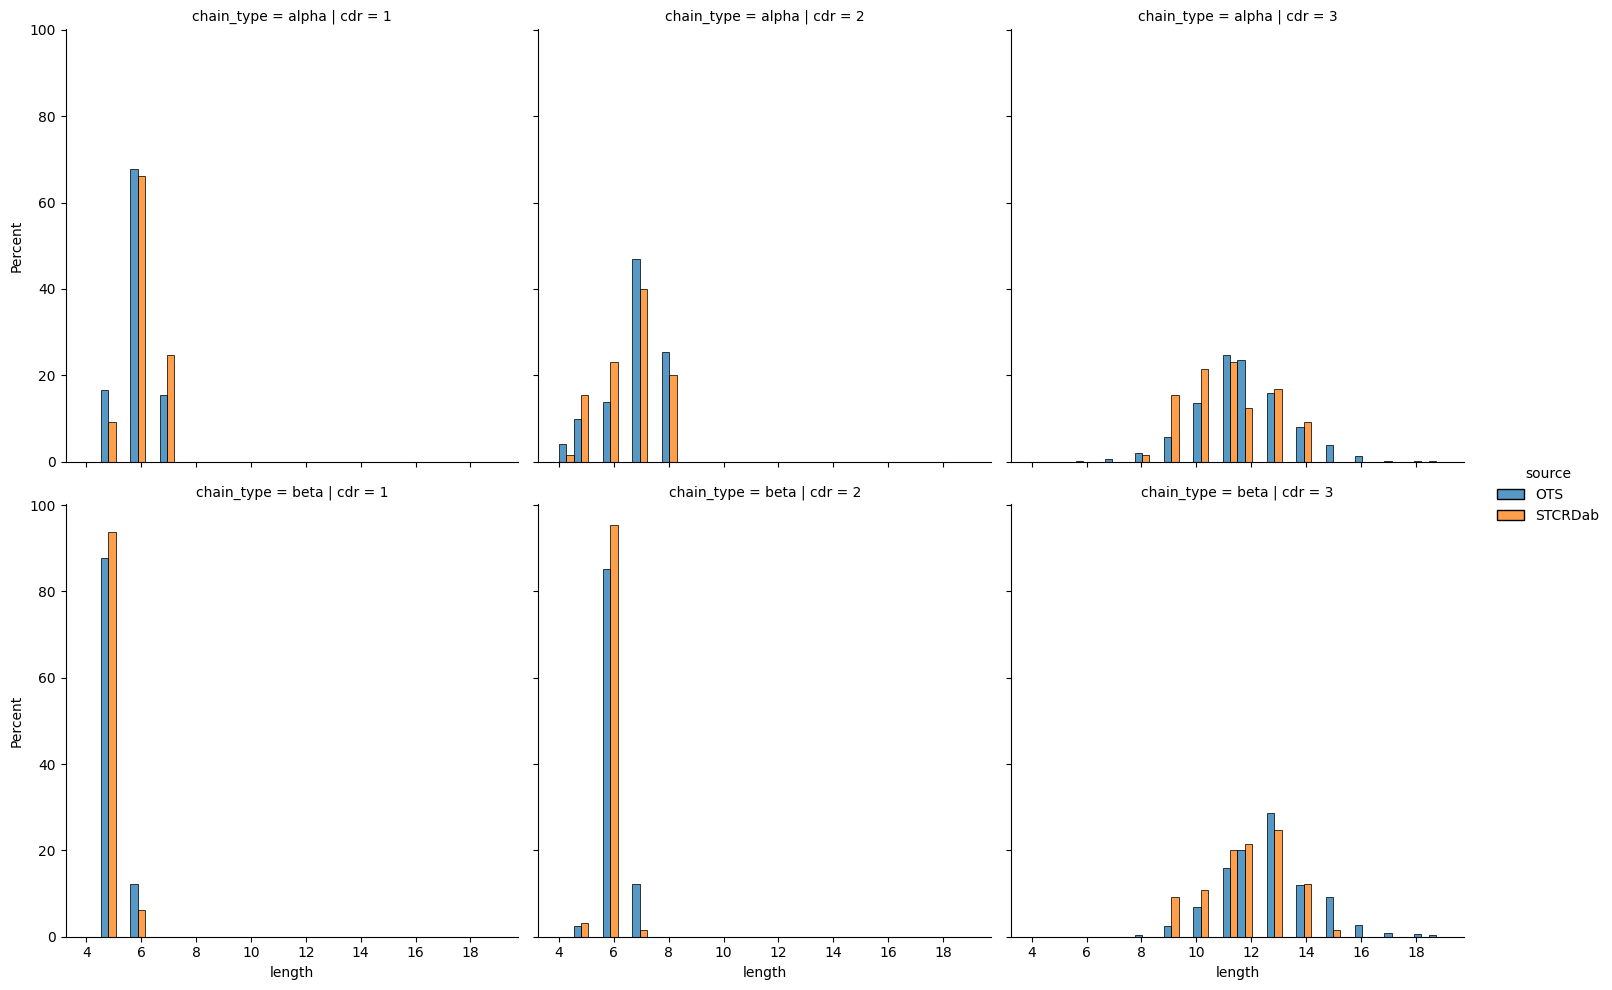

In [17]:
sns.displot(cdr_lengths,
            x='length',
            hue='source',
            row='chain_type', col='cdr',
            stat='percent', common_norm=False,
            multiple='dodge')

plt.savefig('../report/figures/stcrdab_ots_cdr_lengths.svg')
plt.show()

In [18]:
cdr_lengths.groupby(['chain_type', 'cdr', 'source'])['length'].agg([pd.Series.mode, 'mean', 'std'])

mode       mean       std
chain_type cdr source                            
alpha      1   OTS         6   5.989000  0.566745
               STCRDab     6   6.153846  0.565430
           2   OTS         7   6.796000  1.052374
               STCRDab     7   6.615385  1.026102
           3   OTS        11  11.702000  1.712930
               STCRDab    11  11.169231  1.616026
beta       1   OTS         5   5.123000  0.328602
               STCRDab     5   5.061538  0.242186
           2   OTS         6   6.097000  0.373806
               STCRDab     6   5.984615  0.215950
           3   OTS        13  12.625000  1.713859
               STCRDab    13  11.846154  1.533285

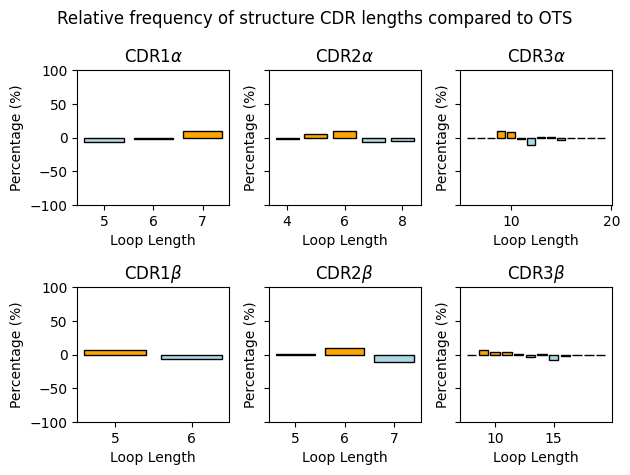

In [19]:
fig, axes = plt.subplots(ncols=3, nrows=2, tight_layout=True, sharey=True)
plt.ylim([-100, 100])
fig.suptitle('Relative frequency of structure CDR lengths compared to OTS')

for i, chain_type in enumerate(('alpha', 'beta')):
    for j, cdr in enumerate(('1', '2', '3')):
        proportion_data = cdr_length_proportions.query("chain_type == @chain_type and cdr == @cdr")
        colors = proportion_data['difference'].map(lambda diff: 'lightblue' if diff < 0 else 'orange')

        axes[i, j].bar(proportion_data['length'], proportion_data['difference'], color=colors, edgecolor='black')

        axes[i, j].set_title(f'CDR{cdr}$\\{chain_type}$')
        axes[i, j].set_xlabel('Loop Length')
        axes[i, j].set_ylabel('Percentage (%)')

plt.savefig('../report/figures/stcrdab_ots_cdr_lengths_proportions.svg')
plt.show()

In [20]:
for chain_type in ('alpha', 'beta'):
    for cdr in ('1', '2', '3'):
        proportion_data = cdr_length_proportions.query("chain_type == @chain_type and cdr == @cdr")
        print(f'CDR{cdr}{chain_type} RMSD:', round(rmsd(proportion_data['difference']), 2))

print()
print('Overall RMSD:', round(rmsd(cdr_length_proportions['difference']), 2))

CDR1alpha RMSD: 6.84
CDR2alpha RMSD: 6.26
CDR3alpha RMSD: 4.67
CDR1beta RMSD: 6.15
CDR2beta RMSD: 8.6
CDR3beta RMSD: 3.65

Overall RMSD: 5.31


Overall, it seems that the distribution of lengths is similar between the *apo*-*holo* structures taken from the STCRDab and the background TCRs from OTS.
The distributions look similar between the data sources, with a slightly larger variety for the OTS TCRs.
Also, the mode length for each CDR type is the same between the OTS background and the dataset used in this analysis (6 for CDR1α, 7 for CDR2α, 11  for CDR3α, 5 for CDR1β, 6 for CDR2β, and 13 for CDR3β).

## TCR Gene Usage

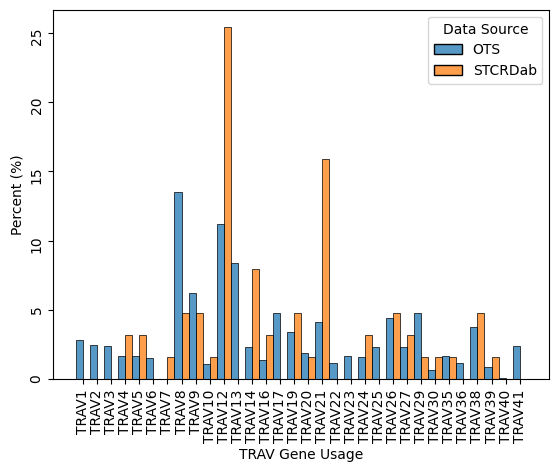

In [21]:
ax = sns.histplot(gene_usage.sort_values('alpha_subgroup_num'),
                  x='alpha_subgroup',
                  hue='source',
                  stat='percent', common_norm=False,
                  multiple='dodge')

ax.set_xlabel('TRAV Gene Usage')
ax.set_ylabel('Percent (%)')
ax.legend_.set_title('Data Source')
ax.tick_params(labelrotation=90)

plt.savefig('../report/figures/stcrdab_ots_trav_gene_usage.svg')
plt.show()

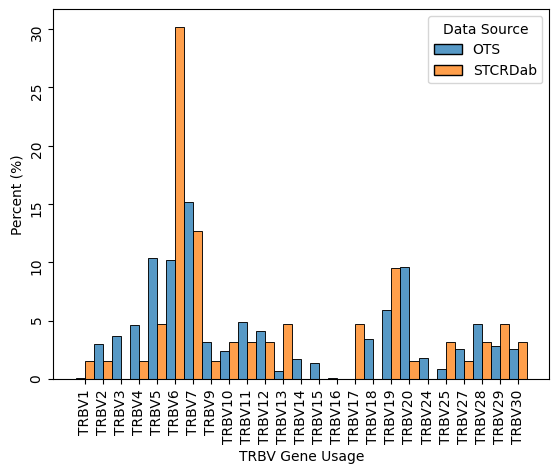

In [22]:
ax = sns.histplot(gene_usage.sort_values('beta_subgroup_num'),
                  x='beta_subgroup',
                  hue='source',
                  stat='percent', common_norm=False,
                  multiple='dodge')

ax.set_xlabel('TRBV Gene Usage')
ax.set_ylabel('Percent (%)')
ax.legend_.set_title('Data Source')
ax.tick_params(labelrotation=90)

plt.savefig('../report/figures/stcrdab_ots_trbv_gene_usage.svg')
plt.show()

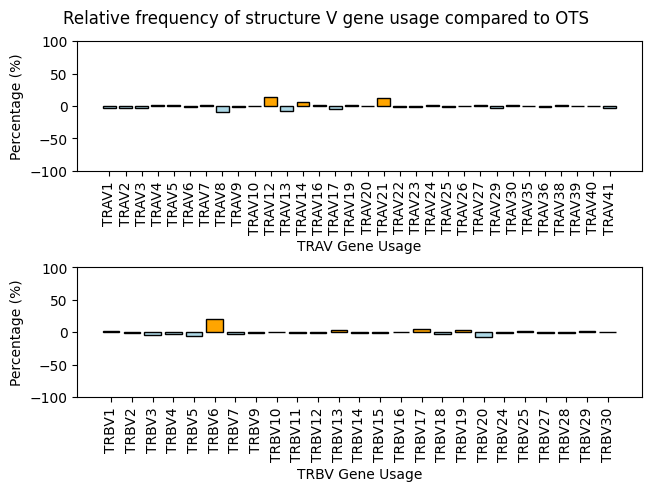

In [23]:
fig, (ax1, ax2) = plt.subplots(nrows=2, constrained_layout=True, sharey=True)
plt.ylim([-100, 100])
fig.suptitle('Relative frequency of structure V gene usage compared to OTS')

# TRAV
colors = trav_genes_proportions['difference'].map(lambda diff: 'lightblue' if diff < 0 else 'orange')

ax1.bar(trav_genes_proportions['alpha_subgroup'],
               trav_genes_proportions['difference'],
               color=colors,
               edgecolor='black')

ax1.set_xlabel('TRAV Gene Usage')
ax1.set_ylabel('Percentage (%)')
ax1.tick_params(axis='x', labelrotation=90)

# TRAV
colors = trbv_genes_proportions['difference'].map(lambda diff: 'lightblue' if diff < 0 else 'orange')

ax2.bar(trbv_genes_proportions['beta_subgroup'],
               trbv_genes_proportions['difference'],
               color=colors,
               edgecolor='black')

ax2.set_xlabel('TRBV Gene Usage')
ax2.set_ylabel('Percentage (%)')
ax2.tick_params(axis='x', labelrotation=90)

plt.savefig('../report/figures/stcrdab_ots_gene_usage_proportions.svg')
plt.show()

In [24]:
print('TRAV Gene Usage RMSD:', round(rmsd(trav_genes_proportions['difference']), 2))
print('TRBV Gene Usage RMSD:', round(rmsd(trbv_genes_proportions['difference']), 2))

TRAV Gene Usage RMSD: 4.37
TRBV Gene Usage RMSD: 5.15


The gene usage between *apo*-*holo* TCRs from STCRDab and the background TCRs from OTS is largely similar.
There are a few exceptions in the STCRDab structures that show an over-representation of certain gene usages.
For exampe, TRAV12, TRAV14, TRAV21, and TRBV6 all seem to be in higher abundance in the STCRDab data compared with the OTS background.

# Comparison of amino acide types in loops

In [25]:
AMINO_ACIDS = ['A', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'K', 'L', 'M', 'N', 'P', 'Q', 'R', 'S', 'T', 'V', 'W', 'Y']

def count_amino_acids(residues: pd.Series, normalize = True) -> pd.Series:
    counts = {res: 0 for res in AMINO_ACIDS}

    for res in residues.tolist():
        counts[res] += 1

    if normalize:
        num_residues = len(residues)
        counts = {res: count / num_residues for res, count in counts.items()}

    counts = pd.Series(counts)
    counts.name = 'count' if not normalize else 'proportion'
    counts.index.name = 'residue'

    return counts

In [26]:
ots_sample_cdrs_residues = ots_sample_cdrs[['chain_type', 'cdr', 'sequence']].copy()
ots_sample_cdrs_residues['residue'] = ots_sample_cdrs_residues['sequence'].map(list)
ots_sample_cdrs_residues = ots_sample_cdrs_residues.explode('residue')

ots_sample_cdrs_residues_counts = (ots_sample_cdrs_residues.groupby(['chain_type', 'cdr'])
                                                            ['residue']
                                                            .apply(count_amino_acids))
ots_sample_cdrs_residues_counts.name = 'proportion'
ots_sample_cdrs_residues_counts = ots_sample_cdrs_residues_counts.to_frame()
ots_sample_cdrs_residues_counts = ots_sample_cdrs_residues_counts.reset_index()

ots_sample_cdrs_residues_counts

,chain_type,cdr,residue,proportion
0,alpha,1,A,0.067791
1,alpha,1,C,0.000000
2,alpha,1,D,0.062615
3,alpha,1,E,0.014527
4,alpha,1,F,0.033228
...,...,...,...,...
115,beta,3,S,0.175842
116,beta,3,T,0.080950
117,beta,3,V,0.020752
118,beta,3,W,0.007683


In [27]:
apo_holo_cdr_sequences_residues = apo_holo_cdr_sequences[['chain_type', 'cdr', 'sequence']].copy()
apo_holo_cdr_sequences_residues['residue'] = apo_holo_cdr_sequences_residues['sequence'].map(list)
apo_holo_cdr_sequences_residues = apo_holo_cdr_sequences_residues.explode('residue')

apo_holo_cdr_sequences_residues_counts = (apo_holo_cdr_sequences_residues.groupby(['chain_type', 'cdr'])
                                          ['residue']
                                          .apply(count_amino_acids))

apo_holo_cdr_sequences_residues_counts.name = 'proportion'
apo_holo_cdr_sequences_residues_counts = apo_holo_cdr_sequences_residues_counts.to_frame()
apo_holo_cdr_sequences_residues_counts = apo_holo_cdr_sequences_residues_counts.reset_index()

apo_holo_cdr_sequences_residues_counts

,chain_type,cdr,residue,proportion
0,alpha,1,A,0.057500
1,alpha,1,C,0.000000
2,alpha,1,D,0.092500
3,alpha,1,E,0.022500
4,alpha,1,F,0.035000
...,...,...,...,...
115,beta,3,S,0.180519
116,beta,3,T,0.059740
117,beta,3,V,0.019481
118,beta,3,W,0.011688


In [28]:
ots_sample_cdrs_residues_counts['source'] = 'ots'
apo_holo_cdr_sequences_residues_counts['source'] = 'stcrdab'

cdr_residue_counts = pd.concat([ots_sample_cdrs_residues_counts, apo_holo_cdr_sequences_residues_counts])

In [29]:
angles = np.linspace(0, 2 * np.pi, len(AMINO_ACIDS), endpoint=False).tolist()
amino_acid_angles = dict(zip(AMINO_ACIDS, angles))

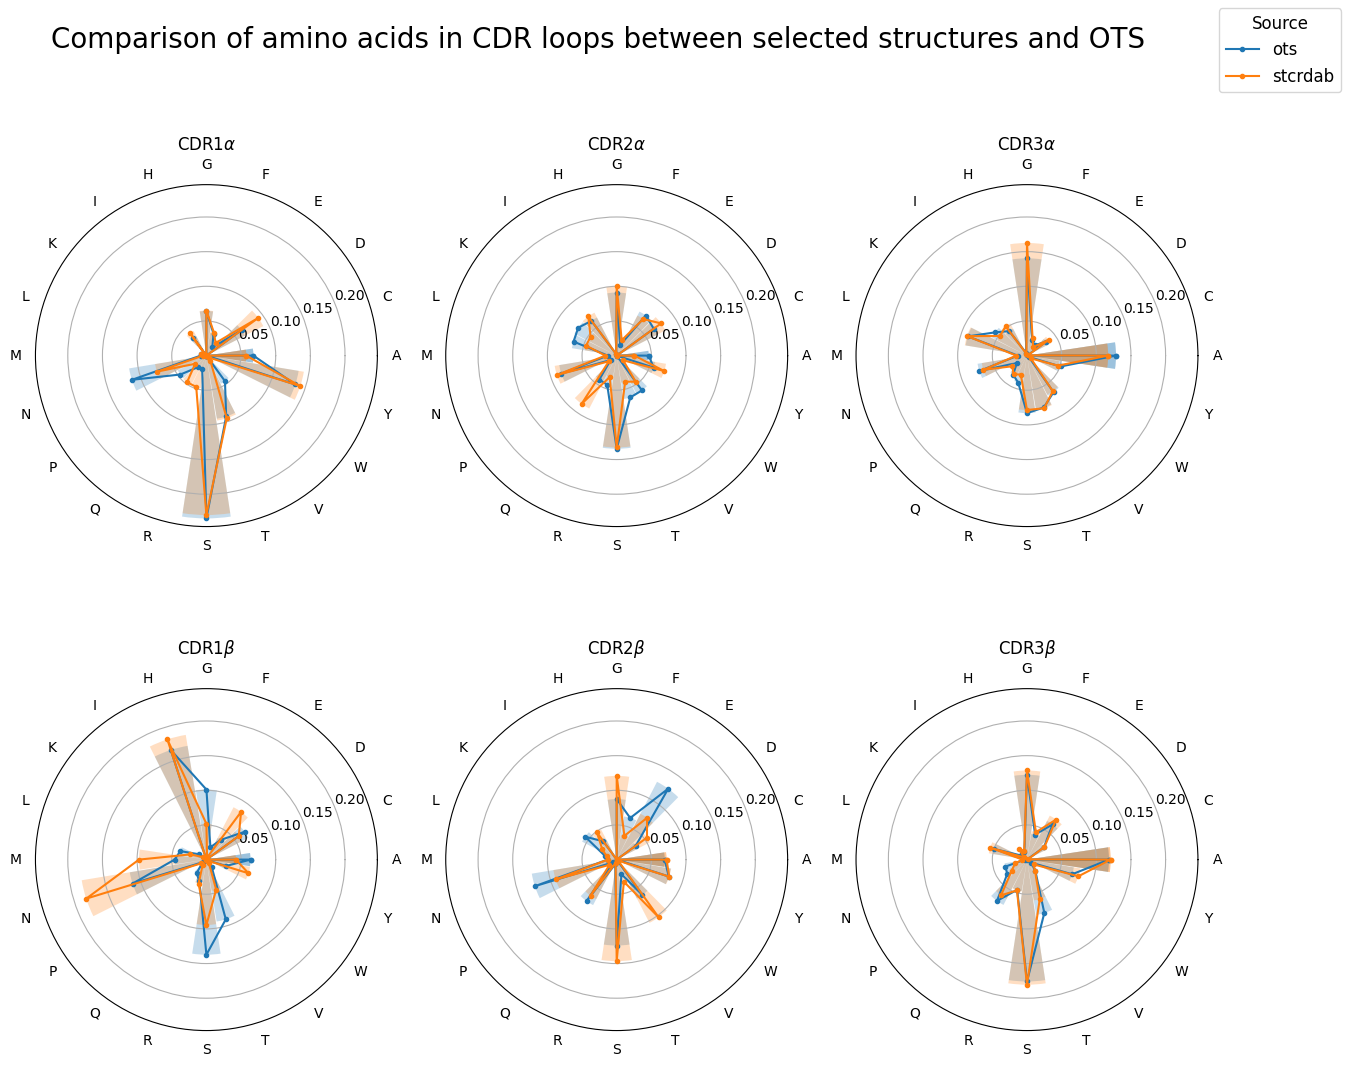

In [30]:
fig, axes = plt.subplots(nrows=2, ncols=3,
                         figsize=(15, 12),
                         sharey=True,
                         subplot_kw={'projection': 'polar'})

lines = []
for i, chain_type in enumerate(('alpha', 'beta')):
    for j, cdr in enumerate(('1', '2', '3')):
        for source in 'ots', 'stcrdab':
            residue_counts = cdr_residue_counts[(cdr_residue_counts['source'] == source)
                                                & (cdr_residue_counts['chain_type'] == chain_type)
                                                & (cdr_residue_counts['cdr'] == cdr)].sort_values('residue')

            proportions = residue_counts['proportion'].tolist()
            label_angles = residue_counts['residue'].map(amino_acid_angles).tolist()

            proportions.append(proportions[0])
            label_angles.append(label_angles[0])

            line, = axes[i, j].plot(label_angles, proportions, marker='o', markersize=3, label=source)
            axes[i, j].bar(label_angles, proportions, alpha=0.25, width=0.3)

            lines.append(line)

        axes[i, j].set_xticks(angles)
        axes[i, j].set_xticklabels(AMINO_ACIDS)
        axes[i, j].grid(which='major', axis='x', visible=False)

        axes[i, j].set_title(f'CDR{cdr}$\\{chain_type}$')

unique_handles_labels = {}
for line in lines:
    label = line.get_label()
    if label not in unique_handles_labels:
        unique_handles_labels[label] = line

labels, handles = zip(*unique_handles_labels.items())

legend = fig.legend(handles, labels, title='Source', fontsize='large')
legend.get_title().set_fontsize('large')

fig.suptitle('Comparison of amino acids in CDR loops between selected structures and OTS',
             fontsize=20)

plt.savefig('../report/figures/stcrdab_ots_aa_composition.svg')
plt.show()

In [31]:
cdr_residue_counts_compare = cdr_residue_counts.pivot(index=['chain_type', 'cdr', 'residue'],
                                                      columns='source',
                                                      values='proportion').reset_index()

cdr_residue_counts_compare['difference'] = cdr_residue_counts_compare['stcrdab'] - cdr_residue_counts_compare['ots']

print(cdr_residue_counts_compare.groupby(['chain_type', 'cdr'])['difference'].agg(rmsd))

print(f"Overall RMSD: {rmsd(cdr_residue_counts_compare['difference']):.2e}")

chain_type  cdr
alpha       1      0.017550
            2      0.015737
            3      0.007479
beta        1      0.030979
            2      0.021822
            3      0.007789
Name: difference, dtype: float64
Overall RMSD: 1.87e-02


# Selected structures coverage of canonical classes

In [32]:
cdr_clusters = pd.read_csv('../data/processed/stcrdab_clusters.csv')
cdr_clusters

,name,cluster,chain_type,cdr,sequence,cluster_type
0,7zt2_DE,12,alpha_chain,1,TSGFNG,pseudo
1,7zt3_DE,12,alpha_chain,1,TSGFNG,pseudo
2,7zt4_DE,12,alpha_chain,1,TSGFNG,pseudo
3,7zt5_DE,12,alpha_chain,1,TSGFNG,pseudo
4,7zt7_DE,12,alpha_chain,1,TSGFNG,pseudo
...,...,...,...,...,...,...
4807,6miv_CD,22,beta_chain,3,ASGDEGYTQY,canonical
4808,3rtq_CD,22,beta_chain,3,ASGDEGYTQY,canonical
4809,3dxa_NO,noise,beta_chain,3,ASRYRDDSYNEQF,NaN
4810,1d9k_AB,noise,beta_chain,3,ASGGQGRAEQF,NaN


In [33]:
cdr_clusters[['pdb_id', 'chains']] = cdr_clusters['name'].str.split('_').apply(pd.Series)
cdr_clusters[['alpha_chain', 'beta_chain']] = cdr_clusters['chains'].apply(list).apply(pd.Series)

In [34]:
common_columns = ['pdb_id', 'alpha_chain', 'beta_chain']
apo_holo_index = pd.MultiIndex.from_frame(apo_holo_summary[common_columns])

cdr_clusters['in_apo_holo'] = cdr_clusters[common_columns].apply(tuple, axis=1).isin(apo_holo_index)

In [35]:
canonical_cdr_clusters = cdr_clusters.query("cluster_type == 'canonical'").copy().reset_index(drop=True)
canonical_cdr_clusters['cluster_num'] = canonical_cdr_clusters['cluster'].map(int)

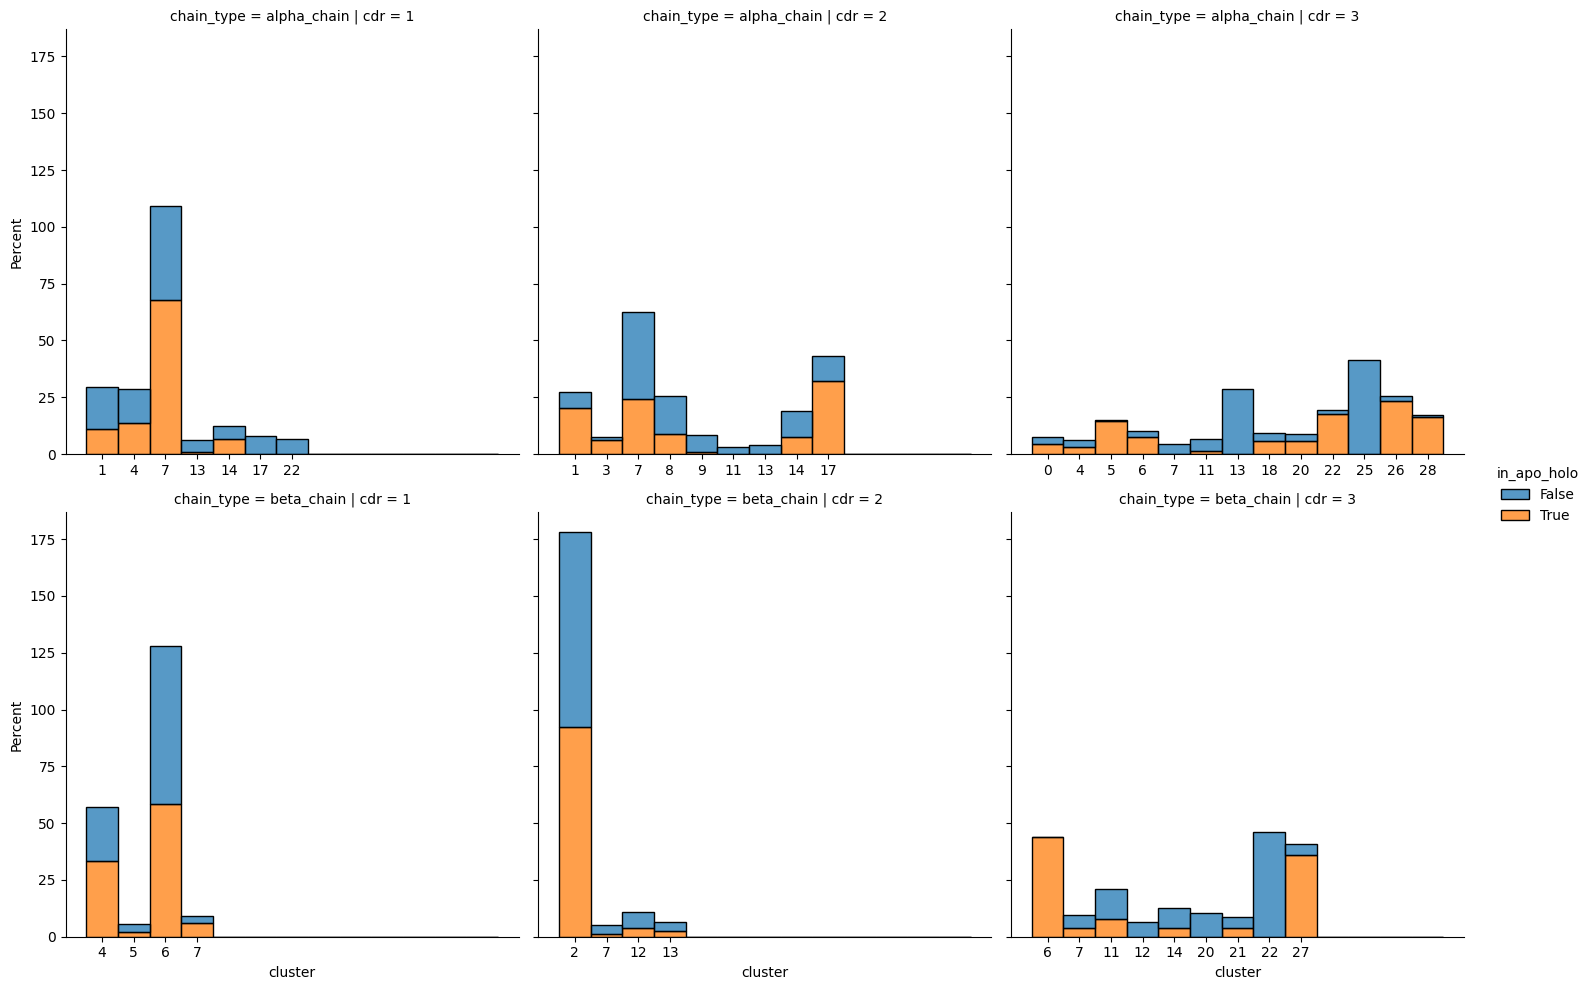

In [36]:
sns.displot(canonical_cdr_clusters.sort_values('cluster_num'),
            row='chain_type', col='cdr',
            x='cluster',
            hue='in_apo_holo', multiple='stack',
            stat='percent', common_norm=False,
            facet_kws=dict(sharex=False))

plt.savefig('../report/figures/dataset_canonical_cluster_coverage.svg')

In [37]:
apo_holo_coverage = (canonical_cdr_clusters.groupby(['chain_type', 'cdr', 'cluster'])
                                           .apply(lambda group: group['in_apo_holo'].any())
                                           .value_counts(normalize=True) * 100)[True]

print(f'There is {apo_holo_coverage:.2f}% coverage of canonical clusters in the apo-holo dataset.')

There is 78.26% coverage of canonical clusters in the apo-holo dataset.


# Conclusion

Our analysis here shows that the conclusions drawn about TCRs from our structural analysis in this project should generalise well to other TCR:pMHC-I interactions where structure information is not currently available.
The comparisons here show that the distribution of CDR lengths, amino acid compisition of CDR loops, and generally the distribution of V gene usage is comparable between the selected STCRDab structures and the background of TCRs sampled from OTS.
However, it does seem that there is some over representation bias of certain V genes which may affect results.
The analysis also shows that canonical CDR loop clusters are well represented in the selected analysis.
We did not look at amino acid composition and other possible comparable properties from these sequences that could be done.